In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import kurtosis, skew

In [2]:
df = pd.read_csv('/content/Nikkei_N225.csv')
df

,Date,Open,High,Low,Close,Adj Close,Volume
0,1965-01-05,1257.719971,1257.719971,1257.719971,1257.719971,1257.719971,0.0
1,1965-01-06,1263.989990,1263.989990,1263.989990,1263.989990,1263.989990,0.0
2,1965-01-07,1274.270020,1274.270020,1274.270020,1274.270020,1274.270020,0.0
3,1965-01-08,1286.430054,1286.430054,1286.430054,1286.430054,1286.430054,0.0
4,1965-01-11,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...
15149,2024-01-29,35814.289063,36186.871094,35813.769531,36026.941406,36026.941406,95500000.0
15150,2024-01-30,36196.640625,36249.031250,36039.308594,36065.859375,36065.859375,87900000.0
15151,2024-01-31,35747.890625,36292.531250,35704.578125,36286.710938,36286.710938,111100000.0
15152,2024-02-01,36008.558594,36146.359375,35924.601563,36011.460938,36011.460938,118100000.0


In [3]:
# df_vals = df.set_index(df.columns[0])
# df_vals

In [4]:
df_yr_mean = df.rolling(window = 28).mean()
df_yr_mean

<ipython-input-4-83ae7c328409>:1: FutureWarning: Dropping of nuisance columns in rolling operations is deprecated; in a future version this will raise TypeError. Select only valid columns before calling the operation. Dropped columns were Index(['Date'], dtype='object')
  df_yr_mean = df.rolling(window = 28).mean()


,Open,High,Low,Close,Adj Close,Volume
0,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...
15149,34506.214774,34727.323940,34353.032645,34550.375558,34550.375558,1.044036e+08
15150,34628.931920,34838.991909,34471.127232,34660.922294,34660.922294,1.025036e+08
15151,34735.312640,34964.061663,34584.103934,34786.912668,34786.912668,1.026536e+08
15152,34850.825056,35068.596261,34700.895787,34886.629464,34886.629464,1.030750e+08


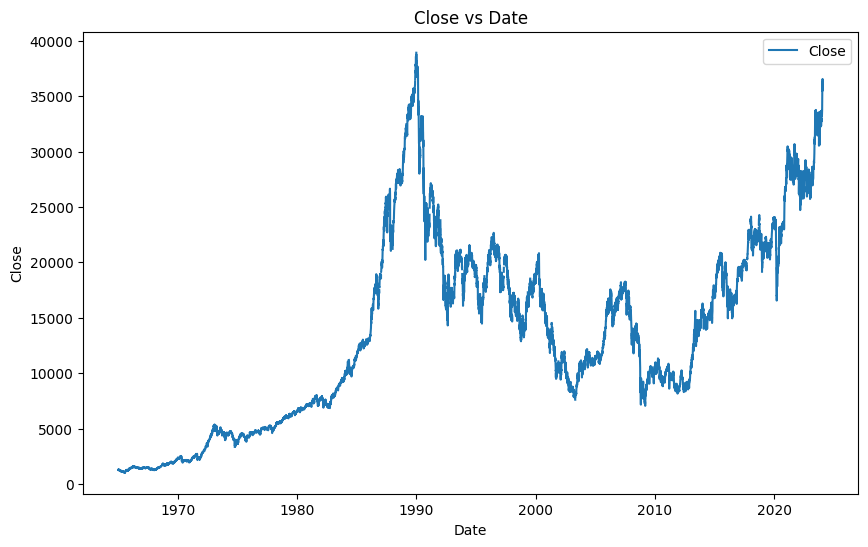

In [5]:
import matplotlib.pyplot as plt
import pandas as pd

# Convert 'Date' column to datetime format
df['Date'] = pd.to_datetime(df['Date'])

# Plotting
plt.figure(figsize=(10, 6))
plt.plot(df['Date'], df['Close'], label='Close')
plt.title('Close vs Date')
plt.xlabel('Date')
plt.ylabel('Close')
plt.legend()
plt.show()



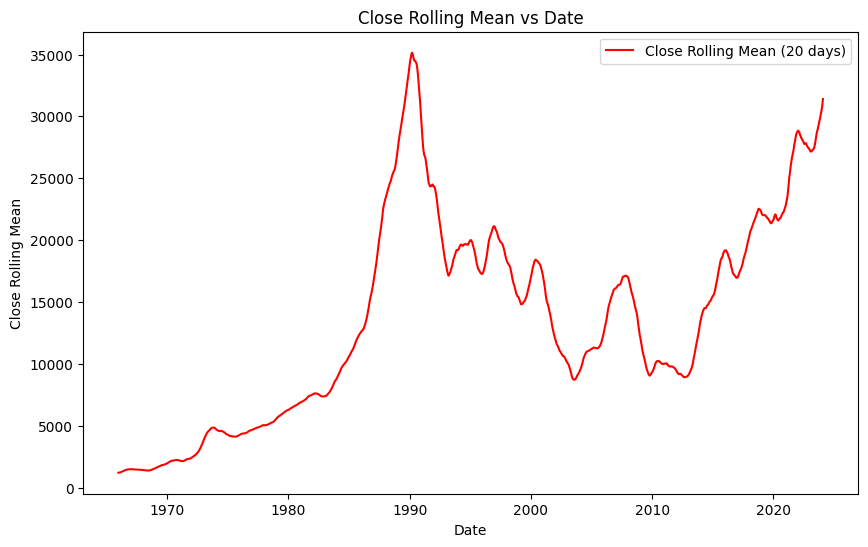

In [6]:
# Convert 'Date' column to datetime format
df['Date'] = pd.to_datetime(df['Date'])

# Fill or interpolate missing values in 'Close' column
df['Close'].fillna(method='ffill', inplace=True)  # Forward fill
# Alternatively, you can use: df['Close'].interpolate(method='linear', inplace=True)

# Calculate the 20-day rolling mean (you can adjust the window size as needed)
df['Close_Rolling_Mean'] = df['Close'].rolling(window=250).mean()

# Plotting the rolling mean separately
plt.figure(figsize=(10, 6))
plt.plot(df['Date'], df['Close_Rolling_Mean'], label='Close Rolling Mean (20 days)', color='red')
plt.title('Close Rolling Mean vs Date')
plt.xlabel('Date')
plt.ylabel('Close Rolling Mean')
plt.legend()
plt.show()

In [7]:
# Convert 'Date' column to datetime format
# df['Date'] = pd.to_datetime(df['Date'])

# # Fill or interpolate missing values in 'Close' column
# df['Close'].fillna(method='ffill', inplace=True)  # Forward fill

# # Calculate the 100-day rolling skewness
# df['Moving_Skewness'] = df['Close'].rolling(window=250).apply(lambda x: skew(x, nan_policy='omit'))

# # Plotting the moving skewness separately
# plt.figure(figsize=(10, 6))
# plt.plot(df['Date'], df['Moving_Skewness'], label='Close Moving Skewness (100 days)', color='green')
# plt.axhline(y=0, color='r', linestyle='--', label='Value 1')
# plt.title('Close Moving Skewness vs Date')
# plt.xlabel('Date')
# plt.ylabel('Close Moving Skewness')
# plt.legend()
# plt.show()

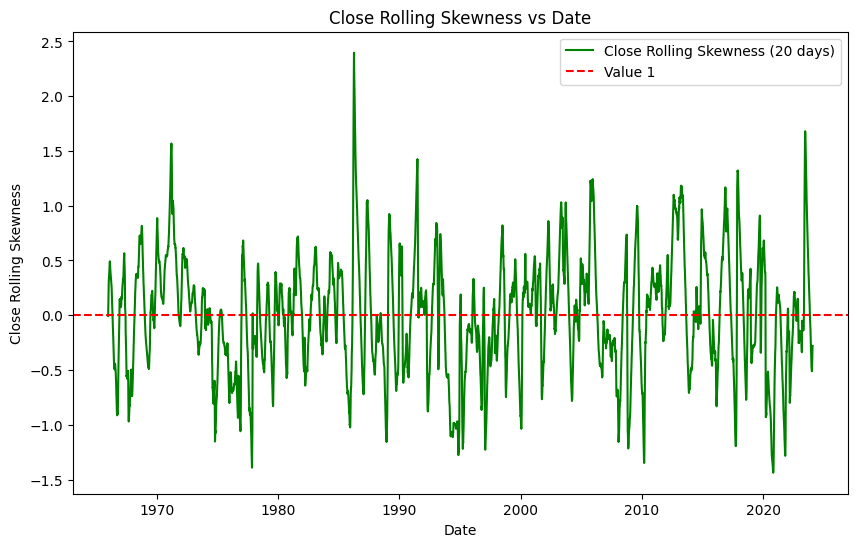

In [8]:
# df['moving_skewness'] = df[df.columns['Close']].rolling(window=100).apply(lambda x: skew(x, nan_policy='omit'))

# Convert 'Date' column to datetime format
df['Date'] = pd.to_datetime(df['Date'])

# Fill or interpolate missing values in 'Close' column
df['Close'].fillna(method='ffill', inplace=True)  # Forward fill

# Calculate the 20-day rolling skewness
df['Close_Rolling_Skewness'] = df['Close'].rolling(window=250).skew()

# Plotting the rolling skewness separately
plt.figure(figsize=(10, 6))
plt.plot(df['Date'], df['Close_Rolling_Skewness'], label='Close Rolling Skewness (20 days)', color='green')
plt.axhline(y=0, color='r', linestyle='--', label='Value 1')
plt.title('Close Rolling Skewness vs Date')
plt.xlabel('Date')
plt.ylabel('Close Rolling Skewness')
plt.legend()
plt.show()

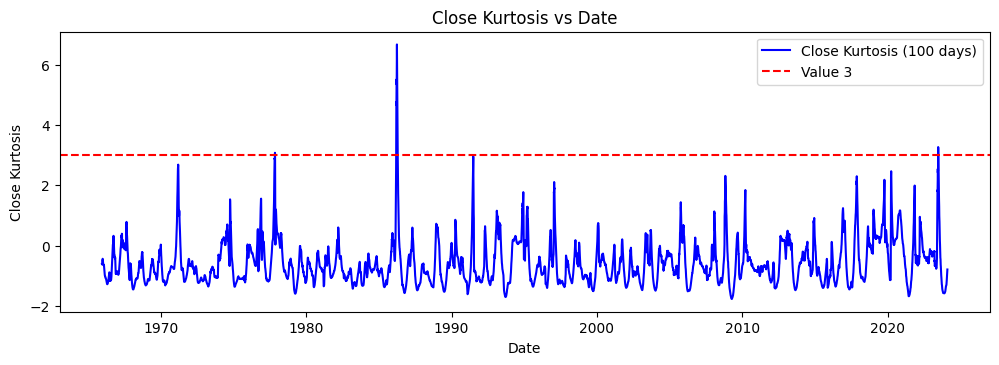

In [9]:
# Convert 'Date' column to datetime format
df['Date'] = pd.to_datetime(df['Date'])

# Fill or interpolate missing values in 'Close' column
df['Close'].fillna(method='ffill', inplace=True)  # Forward fill

# Calculate the kurtosis and excess kurtosis
df['Kurtosis'] = df['Close'].rolling(window=250).kurt()

# Plotting the kurtosis
plt.figure(figsize=(12, 8))

plt.subplot(2, 1, 1)
plt.plot(df['Date'], df['Kurtosis'], label='Close Kurtosis (100 days)', color='blue')
plt.axhline(y=3, color='r', linestyle='--', label='Value 3')
plt.title('Close Kurtosis vs Date')
plt.xlabel('Date')
plt.ylabel('Close Kurtosis')
plt.legend()

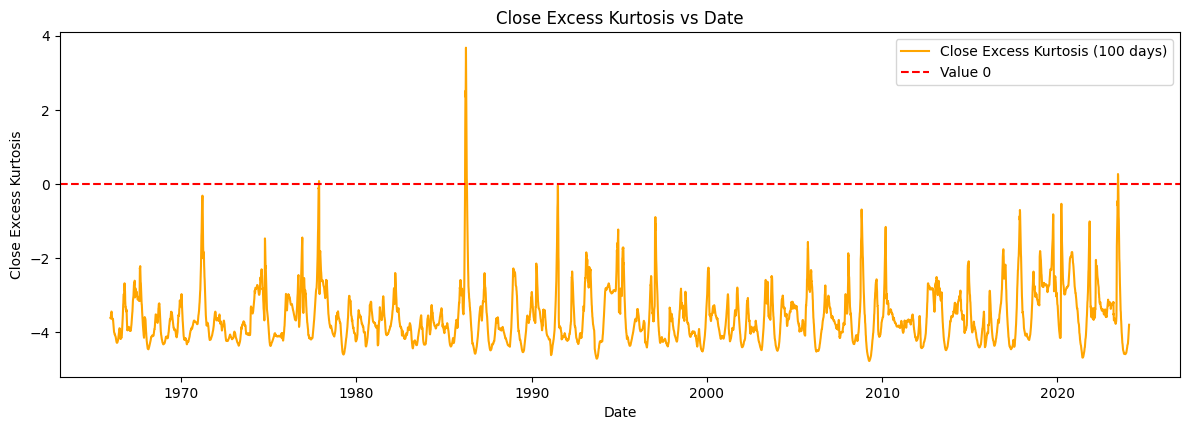

In [10]:
df['Excess_Kurtosis'] = df['Close'].rolling(window=250).kurt() - 3  # Excess kurtosis is calculated by subtracting 3

plt.figure(figsize=(12, 8))
plt.subplot(2, 1, 2)
plt.plot(df['Date'], df['Excess_Kurtosis'], label='Close Excess Kurtosis (100 days)', color='orange')
plt.axhline(y=0, color='r', linestyle='--', label='Value 0')
plt.title('Close Excess Kurtosis vs Date')
plt.xlabel('Date')
plt.ylabel('Close Excess Kurtosis')
plt.legend()

plt.tight_layout()
plt.show()

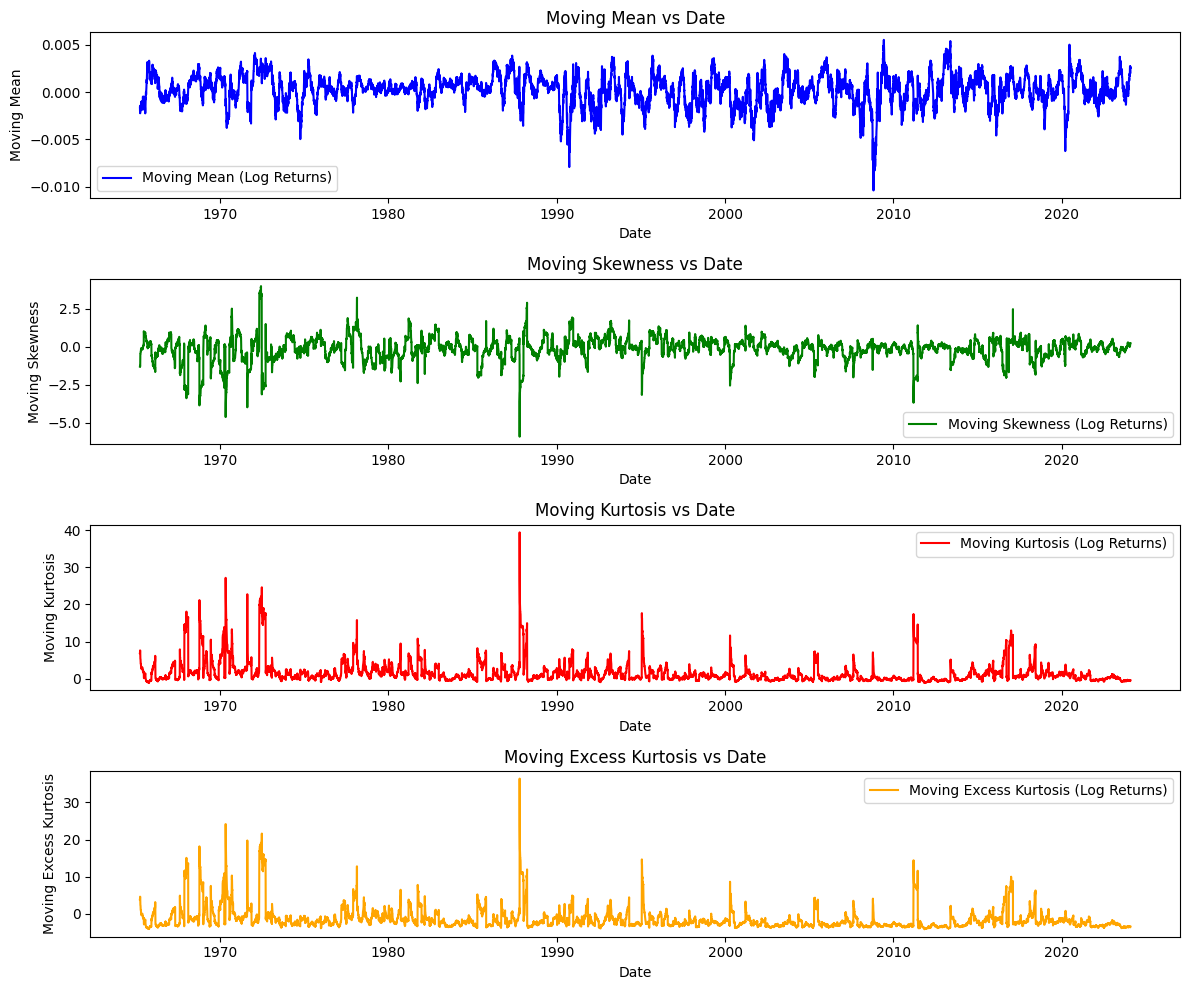

In [11]:
import matplotlib.pyplot as plt
import pandas as pd
from scipy.stats import skew, kurtosis

df['Date'] = pd.to_datetime(df['Date'])

# Fill or interpolate missing values in 'Close' column
df['Close'].fillna(method='ffill', inplace=True)  # Forward fill

# Calculate log returns
df['Log_Returns'] = df['Close'].pct_change().apply(lambda x: np.log(1 + x))

# Calculate the moving mean, moving skewness, moving kurtosis, and moving excess kurtosis for log returns
window_size = 60
df['Moving_Mean'] = df['Log_Returns'].rolling(window=window_size).mean()
df['Moving_Skewness'] = df['Log_Returns'].rolling(window=window_size).apply(lambda x: skew(x, nan_policy='omit'))
df['Moving_Kurtosis'] = df['Log_Returns'].rolling(window=window_size).apply(lambda x: kurtosis(x, nan_policy='omit'))
df['Moving_Excess_Kurtosis'] = df['Moving_Kurtosis'] - 3  # Excess kurtosis is calculated by subtracting 3

# Plotting
plt.figure(figsize=(12, 10))

plt.subplot(4, 1, 1)
plt.plot(df['Date'], df['Moving_Mean'], label='Moving Mean (Log Returns)', color='blue')
plt.title('Moving Mean vs Date')
plt.xlabel('Date')
plt.ylabel('Moving Mean')
plt.legend()

plt.subplot(4, 1, 2)
plt.plot(df['Date'], df['Moving_Skewness'], label='Moving Skewness (Log Returns)', color='green')
plt.title('Moving Skewness vs Date')
plt.xlabel('Date')
plt.ylabel('Moving Skewness')
plt.legend()

plt.subplot(4, 1, 3)
plt.plot(df['Date'], df['Moving_Kurtosis'], label='Moving Kurtosis (Log Returns)', color='red')
plt.title('Moving Kurtosis vs Date')
plt.xlabel('Date')
plt.ylabel('Moving Kurtosis')
plt.legend()

plt.subplot(4, 1, 4)
plt.plot(df['Date'], df['Moving_Excess_Kurtosis'], label='Moving Excess Kurtosis (Log Returns)', color='orange')
plt.title('Moving Excess Kurtosis vs Date')
plt.xlabel('Date')
plt.ylabel('Moving Excess Kurtosis')
plt.legend()

plt.tight_layout()
plt.show()
